<a href="https://colab.research.google.com/github/Akshayvm98/Akshayvm98.github.io/blob/master/S8/s8(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S8/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/S8


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [0]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


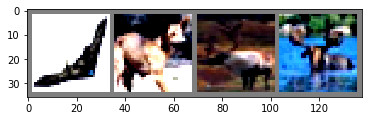

In [0]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [0]:
epochs = 25

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  scheduler.step()
  test.test(net, device, loader.testloader, criterion)

Epoch= 0 Loss=1.1429593563079834 Batch_id=781 Accuracy=43.63: 100%|██████████| 782/782 [01:05<00:00, 13.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0187, Accuracy: 5727/10000 (57.27%)



Epoch= 1 Loss=1.501775860786438 Batch_id=781 Accuracy=62.48: 100%|██████████| 782/782 [01:08<00:00, 11.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0157, Accuracy: 6472/10000 (64.72%)



Epoch= 2 Loss=0.6811957359313965 Batch_id=781 Accuracy=70.35: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0122, Accuracy: 7233/10000 (72.33%)



Epoch= 3 Loss=0.5976159572601318 Batch_id=781 Accuracy=75.97: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0108, Accuracy: 7630/10000 (76.30%)



Epoch= 4 Loss=0.6962484121322632 Batch_id=781 Accuracy=79.24: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0107, Accuracy: 7660/10000 (76.60%)



Epoch= 5 Loss=0.6422437429428101 Batch_id=781 Accuracy=81.40: 100%|██████████| 782/782 [01:10<00:00, 12.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 8102/10000 (81.02%)



Epoch= 6 Loss=0.48326605558395386 Batch_id=781 Accuracy=85.71: 100%|██████████| 782/782 [01:10<00:00, 12.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0075, Accuracy: 8359/10000 (83.59%)



Epoch= 7 Loss=0.6431379318237305 Batch_id=781 Accuracy=86.60: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8408/10000 (84.08%)



Epoch= 8 Loss=0.7155333161354065 Batch_id=781 Accuracy=87.06: 100%|██████████| 782/782 [01:10<00:00, 11.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8412/10000 (84.12%)



Epoch= 9 Loss=0.538253664970398 Batch_id=781 Accuracy=87.59: 100%|██████████| 782/782 [01:10<00:00, 11.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0074, Accuracy: 8416/10000 (84.16%)



Epoch= 10 Loss=0.2121380865573883 Batch_id=781 Accuracy=88.14: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8459/10000 (84.59%)



Epoch= 11 Loss=0.35864508152008057 Batch_id=781 Accuracy=88.53: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8496/10000 (84.96%)



Epoch= 12 Loss=0.28179627656936646 Batch_id=781 Accuracy=89.68: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8507/10000 (85.07%)



Epoch= 13 Loss=0.5669735670089722 Batch_id=781 Accuracy=89.79: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8507/10000 (85.07%)



Epoch= 14 Loss=0.3136090934276581 Batch_id=781 Accuracy=89.85: 100%|██████████| 782/782 [01:10<00:00, 12.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8493/10000 (84.93%)



Epoch= 15 Loss=0.38734957575798035 Batch_id=781 Accuracy=90.01: 100%|██████████| 782/782 [01:10<00:00, 12.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8519/10000 (85.19%)



Epoch= 16 Loss=0.31051185727119446 Batch_id=781 Accuracy=89.94: 100%|██████████| 782/782 [01:10<00:00, 11.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 8534/10000 (85.34%)



Epoch= 17 Loss=0.46600237488746643 Batch_id=781 Accuracy=90.09: 100%|██████████| 782/782 [01:10<00:00, 12.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8518/10000 (85.18%)



Epoch= 18 Loss=0.4423375129699707 Batch_id=781 Accuracy=90.31: 100%|██████████| 782/782 [01:10<00:00, 11.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8524/10000 (85.24%)



Epoch= 19 Loss=0.42099446058273315 Batch_id=781 Accuracy=90.47: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 8527/10000 (85.27%)



Epoch= 20 Loss=0.45191246271133423 Batch_id=781 Accuracy=90.47: 100%|██████████| 782/782 [01:10<00:00, 11.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8523/10000 (85.23%)



Epoch= 21 Loss=0.327448308467865 Batch_id=781 Accuracy=90.29: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8521/10000 (85.21%)



Epoch= 22 Loss=0.3454991281032562 Batch_id=781 Accuracy=90.51: 100%|██████████| 782/782 [01:10<00:00, 12.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8534/10000 (85.34%)



Epoch= 23 Loss=0.2744697034358978 Batch_id=781 Accuracy=90.47: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8525/10000 (85.25%)



Epoch= 24 Loss=0.16699683666229248 Batch_id=781 Accuracy=90.47: 100%|██████████| 782/782 [01:10<00:00, 11.09it/s]



Validation set: Average loss: 0.0069, Accuracy: 8519/10000 (85.19%)



# Result visualization

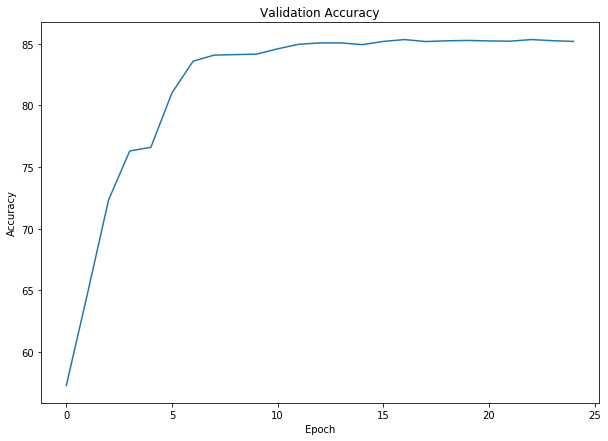

In [0]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_accuracy_change_plot.jpg')

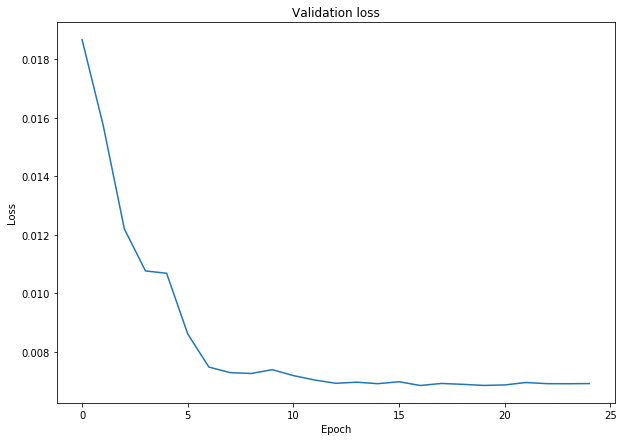

In [0]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_loss_change_plot.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog   dog  deer   dog


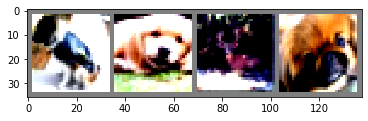

In [0]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   dog   dog   dog


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:04<00:00, 33.05it/s]

Accuracy of plane : 88 %
Accuracy of   car : 91 %
Accuracy of  bird : 81 %
Accuracy of   cat : 68 %
Accuracy of  deer : 91 %
Accuracy of   dog : 87 %
Accuracy of  frog : 90 %
Accuracy of horse : 80 %
Accuracy of  ship : 90 %
Accuracy of truck : 97 %
